<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

This data was downloaded from 1994 Census bureau database by Ronny Kahovi and Barry Becker (Data Mining and Visualization, Silicon Graphics).


**Listing of attributes:**

* >50K, <=50K.

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.




In [2]:
# install data repository from ucim
pip install ucimlrepo

In [32]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets


# variable information
print(census_income.variables)


              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [33]:
# combining Target and Feautures variables
concensus = pd.concat([X,y], axis = 1)
# look into the data
print(concensus.head())
# checking missing values
print(concensus.isna().sum())



   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [66]:

# relevant desc
print(concensus.describe())
concensus.info()

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  47621.000000  4.762100e+04   47621.000000  47621.000000  47621.000000   
mean      38.640684  1.897271e+05      10.090821   1091.137649     87.853489   
std       13.558961  1.055695e+05       2.568320   7487.228336    404.010612   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175840e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.782820e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377200e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    47621.000000  
mean        40.600050  
std         12.260345  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 t

In [67]:
for each in concensus.columns:
    print('Percent of null values',each,':',concensus[each].isnull().mean()*100)

# remove  missing values
concensus = concensus.dropna()
print(f'the dimension of the dataset:{concensus.shape} and missing values : {concensus.isna().sum()}')

Percent of null values age : 0.0
Percent of null values workclass : 0.0
Percent of null values fnlwgt : 0.0
Percent of null values education : 0.0
Percent of null values education-num : 0.0
Percent of null values marital-status : 0.0
Percent of null values occupation : 0.0
Percent of null values relationship : 0.0
Percent of null values race : 0.0
Percent of null values sex : 0.0
Percent of null values capital-gain : 0.0
Percent of null values capital-loss : 0.0
Percent of null values hours-per-week : 0.0
Percent of null values native-country : 0.0
Percent of null values income : 0.0
the dimension of the dataset:(47621, 15) and missing values : age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


There is 9 categorical columns in the dataset. For each categorical variable, we are going to look into unique categorical values.

In [68]:
categorical_variables = [feature for feature in concensus.columns if concensus[feature].dtype in ['O','bool_']]
print('Number of categorical variables =>',len(categorical_variables),'\nCategorical Variables=>',categorical_variables)

# Number of categories in categorical variables
total =0
for feature in categorical_variables:
    print(feature,'=>',concensus[feature].nunique())
    total += concensus[feature].nunique()
print('Total category:',total)

Number of categorical variables => 9 
Categorical Variables=> ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
workclass => 9
education => 16
marital-status => 7
occupation => 15
relationship => 6
race => 5
sex => 2
native-country => 42
income => 4
Total category: 106


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



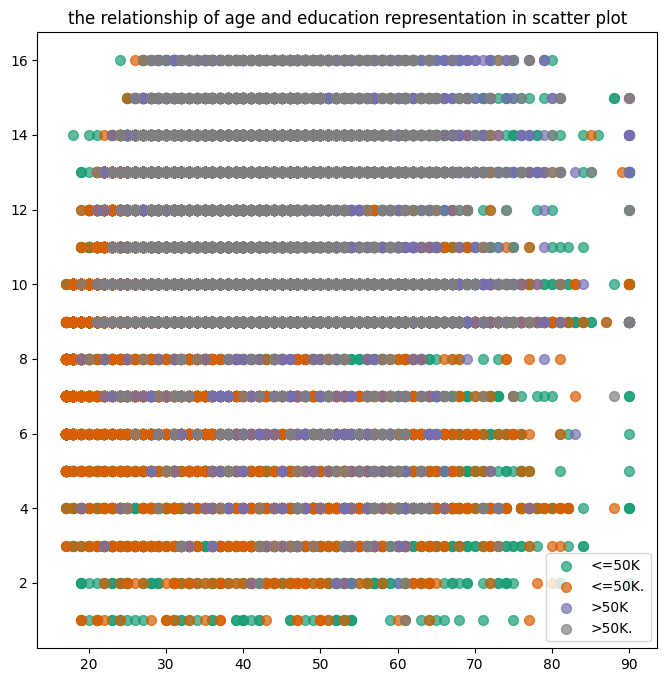

In [78]:

# create a Scatter plot , BAR plot , Line Chart ,Historgram as multiplots
# scatter plot
concensus
AGE = concensus['age'].values
EDUCATION = concensus["education-num"].values

INCOME = concensus.income.values
INCOME_ = np.unique(INCOME)
COLORS = ["#1B9E77", "#D95F02","#7570B3",'grey']
fig, ax = plt.subplots(figsize=(8,8))
for income, color in zip(INCOME_, COLORS):
    idxs = np.where(INCOME == income)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        AGE[idxs], EDUCATION[idxs], label=income,
        s=50, color=color, alpha=0.7

    )
ax.legend()
plt.title('the relationship of age and education representation in scatter plot' )
plt.show()

Text(0.5, 1.0, 'Bar Plot')

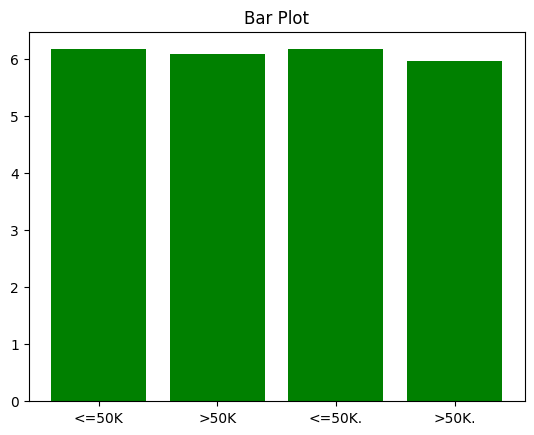

In [122]:
# barplot
plt.bar(x = concensus.income, height = np.log10(concensus.fnlwgt), color='green')
plt.title('Bar Plot')

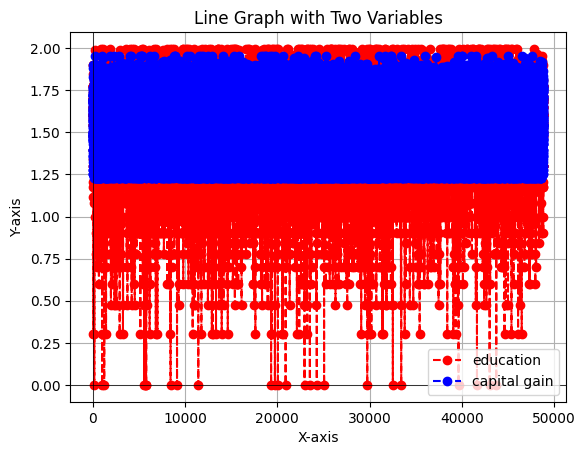

In [106]:
#plt.plot(np.cumsum(concensus['education-num']),np.cumsum(concensus['capital-gain']), alpha = 1.0)
plt.plot( np.log10(concensus['hours-per-week']), color='red', linestyle='dashed', marker='o', label='education')
plt.plot(np.log10(concensus['age']), color='blue', linestyle='dashed', marker='o', label='capital gain')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Graph with Two Variables')

# Add a grid
plt.grid(True)

# Change the background color
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show the plot
plt.legend()
plt.show()

(array([1.9650e+03, 3.8380e+03, 3.3717e+04, 1.4230e+03, 0.0000e+00,
        3.1260e+03, 1.8360e+03, 1.6880e+03, 2.1000e+01, 7.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

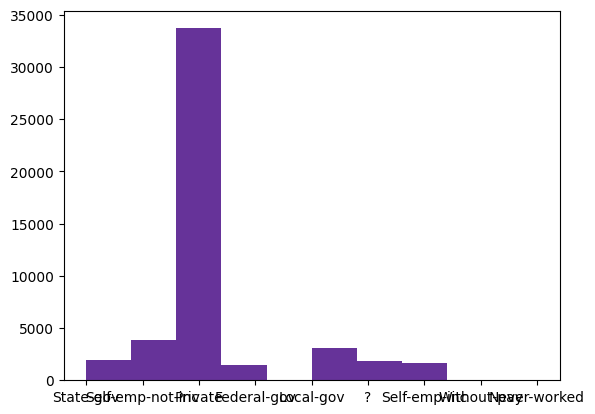

In [113]:
plt.hist( x='workclass',data = concensus,color='#663399')
plt.title('workclass')

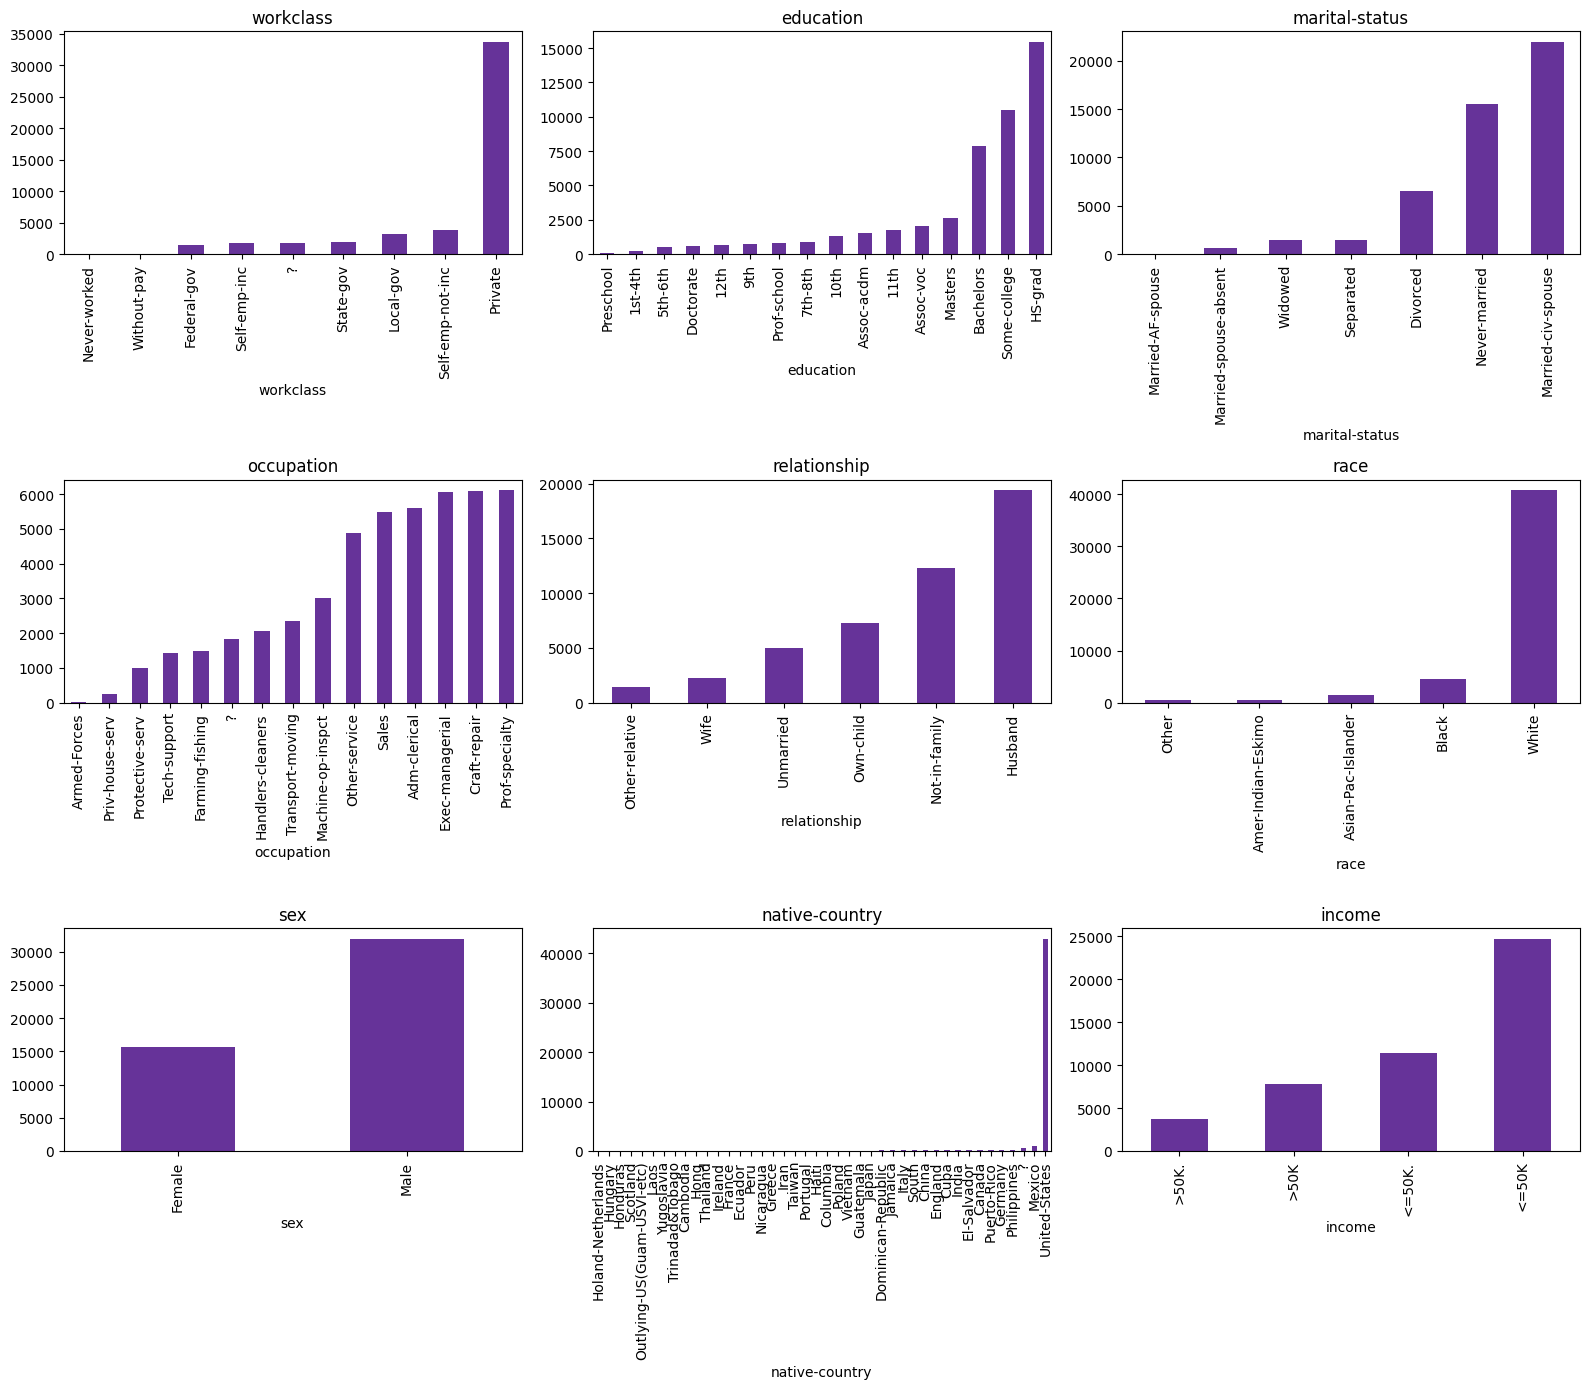

In [114]:
import math
or_palette = sns.cubehelix_palette(start=2.8, rot=0.1, dark=0.3, light=0.8, reverse=True)

fields=concensus.select_dtypes(exclude="number").columns

figuresize=(16,14)
cols=3
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    concensus[fields[i-1]].value_counts().sort_values().plot.bar(color='#663399')
    plt.xticks(rotation=90)
    plt.title(fields[i-1])

plt.tight_layout()
plt.show()

# Seaborm
we are going to create the same kind of plot using seaborn library. Seaborn is often preferred over Matplotlib for its simplicity, built-in statistical plotting capabilities, and aesthetically pleasing default styles


Text(0.5, 0.98, 'Imcome by gender ')

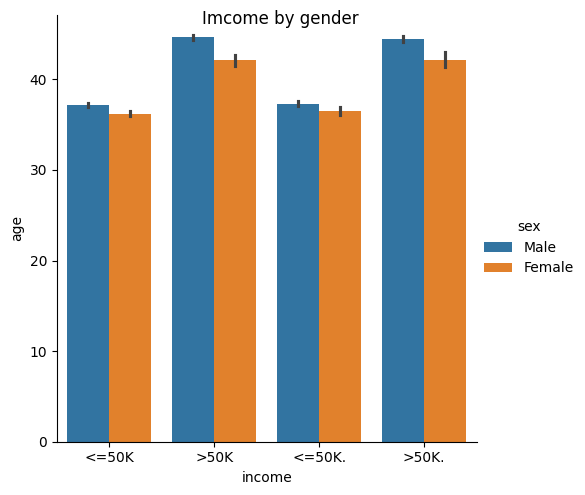

In [118]:
g = sns.catplot( x = 'income', y = 'age', data = concensus,
            kind = 'bar', hue = 'sex')
g.fig.suptitle('Income by Gender ')

Text(0.5, 0.98, 'Income by Gender ')

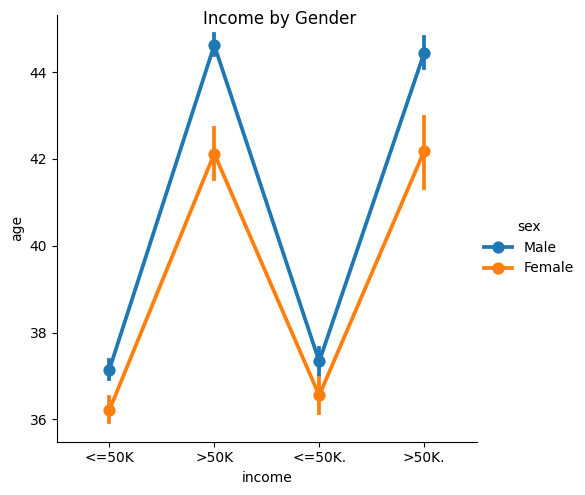

In [121]:
g = sns.catplot( x = 'income', y = 'age', data = concensus,
            kind = 'point', hue = 'sex')
g.fig.suptitle('Income by Gender ')

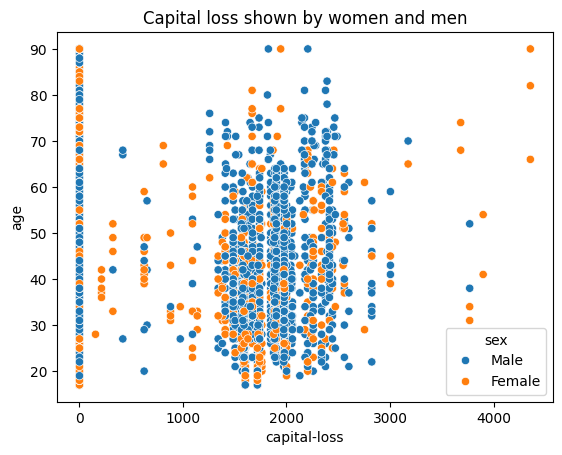

In [126]:
sns.scatterplot(x="capital-loss",
                y="age",
                data=concensus,
                hue="sex")
plt.title('Capital loss shown by women and men')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


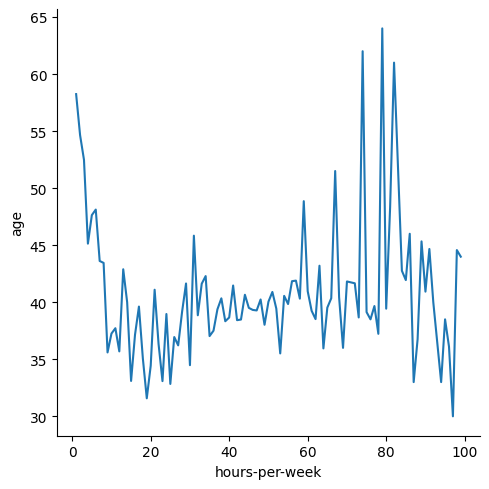

In [128]:
sns.relplot(x="hours-per-week",
            y="age",
            data=concensus,
            kind="line",
            ci=None)
plt.show()


# Conclusions  

Seaborn library offers more flexibility and it is faster handling graph for big datasets. Seaborn provides a high-level interface for creating attractive statistical graphics with minimal code. It's designed to work seamlessly with pandas DataFrames and offers simplified functions for common statistical plots like bar plots, box plots, violin plots, and more. This makes it easier to create complex visualizations quickly. Seaborn is often preferred over Matplotlib for its simplicity, built-in statistical plotting capabilities, and aesthetically pleasing default styles

From the cencus, majority of people with high school diploma seems to have a capital loss and struggle. More white males are employed and significantly, the majority of people are making $ 50000 or less. The private sector seems to employ more people than Federal, state-govenements  